In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [2]:
subdir = 'datasets/12-22-18-converted/'
actors = pd.read_csv(subdir+'Actors-basic.csv')
#principals = pd.read_csv(subdir+'Principals.csv')
#crew = pd.read_csv(subdir+'Title-crew.csv')

In [3]:
actors.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0037382,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0059956,tt0057345,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,soundtrack","tt0072562,tt0080455,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"


In [4]:
actors = actors.dropna(subset=['knownForTitles'])
actors['knownForTitles'] = actors['knownForTitles'].astype(str)
#test = actors.head(1000)
actors=pd.concat([actors,actors.knownForTitles.str.split(',',expand=True)],1)
actors.head()    

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,0,1,2,3,4,5,6
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",tt0053137,tt0043044,tt0050419,tt0072308,None,None,None
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0037382,tt0071877,tt0117057",tt0038355,tt0037382,tt0071877,tt0117057,None,None,None
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0059956,tt0057345,tt0054452,tt0049189",tt0059956,tt0057345,tt0054452,tt0049189,None,None,None
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,soundtrack","tt0072562,tt0080455,tt0078723,tt0077975",tt0072562,tt0080455,tt0078723,tt0077975,None,None,None
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827",tt0083922,tt0050976,tt0050986,tt0060827,None,None,None


In [5]:
from datetime import datetime
today = datetime.now()
actors['deathYear_2'] = actors.deathYear.fillna(2019)
actors['Age'] = actors.deathYear_2 - actors.birthYear

In [6]:
actors = actors[actors['birthYear']>1898]
actors.describe()

,birthYear,deathYear,deathYear_2,Age
count,427464.000000,118421.000000,427464.000000,427464.000000
mean,1956.018687,1997.159718,2012.949554,56.930867
std,25.805230,16.399956,13.040143,19.805330
min,1899.000000,1911.000000,1911.000000,-33.000000
25%,1936.000000,1987.000000,2015.000000,41.000000
50%,1961.000000,2001.000000,2019.000000,55.000000
75%,1978.000000,2010.000000,2019.000000,73.000000
max,2018.000000,2018.000000,2019.000000,120.000000


/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/bradkittrell/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


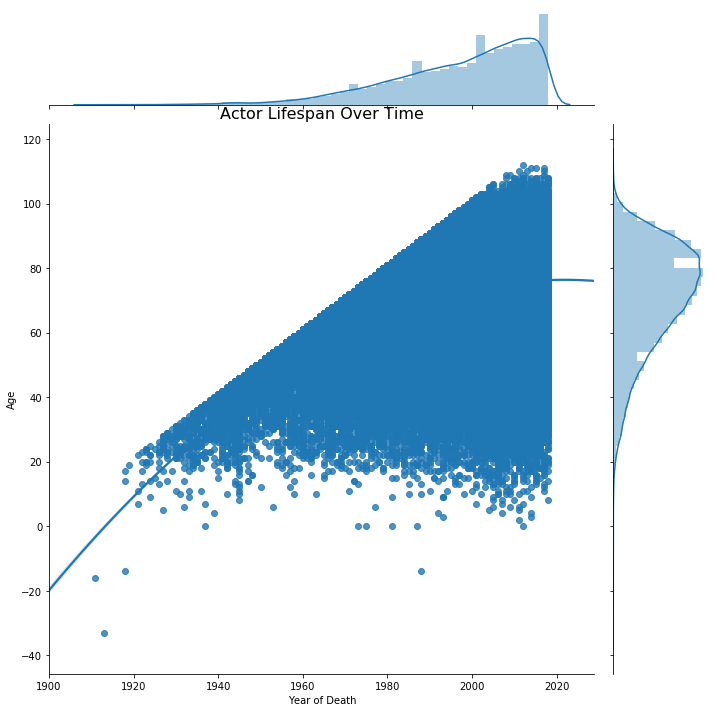

In [9]:
plt.figure(figsize=(15,15))
sns.jointplot(data=actors,x='deathYear',y='Age',kind='reg',order=2,height=10)
plt.ylabel('Age')
plt.xlabel('Year of Death')
plt.title('Actor Lifespan Over Time',fontsize=16)
plt.legend()
plt.show()
plt.clf()